## Snippets from chapter 8

First code snippet

In [1]:
import pandas as pd

df = pd.read_csv('data/stock_prices.csv')
df.head()

,Date,Stock,Close
0,2011-05-25,DTE,51.12
1,2011-05-24,DTE,51.51
2,2011-05-23,DTE,51.47
3,2011-05-20,DTE,51.90
4,2011-05-19,DTE,51.91


Second code snippet

In [2]:
from dateutil.parser import parse
df['Date'] = df.apply(lambda row: parse(row['Date']), axis = 1) 

Third code snippet

In [3]:
df_matrix = df.pivot(index='Date', columns='Stock', values='Close')

Fourth code snippet

In [4]:
df = df[df['Date'] != parse('2002-02-01')]
df_matrix = df.pivot(index='Date', columns='Stock', values='Close')

Fifth code snippet

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


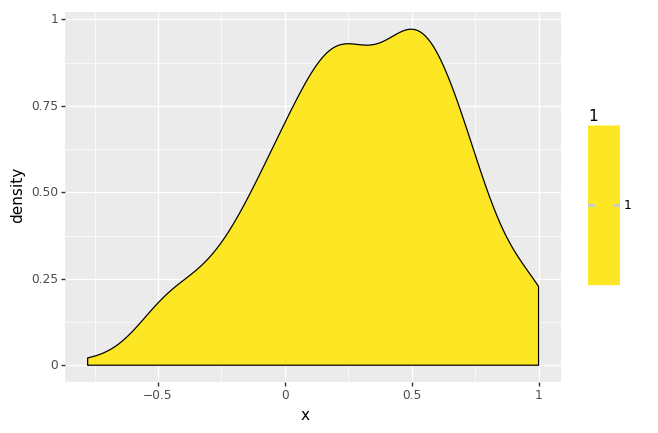

<ggplot: (126570832185)>

In [5]:
%matplotlib inline
from plotnine import *
import itertools

correlations = df_matrix.corr().values.tolist()
correlations = list(itertools.chain(*correlations))

fig = (
    ggplot(data = pd.DataFrame({'x': correlations}), mapping=aes(x = 'x',  fill = '1')) +
    geom_density()
)

fig